## Imports {-}

In [1]:
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy
import re
import contractions
import nltk
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer
import spacy
nlp = spacy.load('en_core_web_sm')
all_stopwords = nlp.Defaults.stop_words
lemmatizer = WordNetLemmatizer()
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words

from typing import List
import sys

sys.path.append('.')
import pandas as pd
import os

import string
from nltk.corpus import stopwords
from functools import reduce

In [2]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import gensim
import gensim.corpora as corpora
import gensim.models

import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'/mallet-2.0.8'})
from gensim.models import CoherenceModel

!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

from pprint import pprint

distutils: /Applications/anaconda3/include/python3.8/UNKNOWN
sysconfig: /Applications/anaconda3/include/python3.8
user = False
home = None
root = None
prefix = None
distutils: /Applications/anaconda3/include/python3.8/UNKNOWN
sysconfig: /Applications/anaconda3/include/python3.8
user = False
home = None
root = None
prefix = None


In [3]:
topic_modeling_df = pd.read_csv('/Users/JoKerry/Desktop/CSML1030 - Machine Learning Capstone/mimic_admissions_and_discharge/2 TFIDF/Discharge/topic_modeling_discharge_df_with_age_filtered.csv')
topic_modeling_df

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HADM_ID,SEQ_NUM,ICD9_CODE,CATEGORY,TEXT,AGE,ROW_ID,SUBJECT_ID
0,153714.0,1.0,5849,Discharge summary,DISCHARGE DIAGNOSIS: \n\nDISCHARGE MEDICATIONS...,51,29492,24136
1,165367.0,1.0,51881,Nursing/other,DISCHARGE DIAGNOSIS: \n\nDISCHARGE MEDICATIONS...,65,36317,29799
2,129565.0,1.0,51881,Discharge summary,DISCHARGE DIAGNOSIS: PRIMARY DIAGNOSIS: Respir...,79,47150,62854
3,141170.0,1.0,51881,Nursing,DISCHARGE DIAGNOSIS: \n\nDISCHARGE MEDICATIONS...,65,36132,29631
4,184643.0,1.0,5849,Discharge summary,DISCHARGE DIAGNOSIS: primary: cardiac arrest a...,59,17278,14106
...,...,...,...,...,...,...,...,...
31972,154989.0,32.0,53081,Nursing/other,DISCHARGE DIAGNOSIS: \n\nDISCHARGE MEDICATIONS...,65,30465,24955
31973,133827.0,32.0,53081,Radiology,DISCHARGE DIAGNOSIS: \n\nDISCHARGE MEDICATIONS...,73,48045,65659
31974,179548.0,32.0,4019,Discharge summary,DISCHARGE DIAGNOSIS: \n\nDISCHARGE MEDICATIONS...,79,48580,67348
31975,129551.0,36.0,4019,Radiology,DISCHARGE DIAGNOSIS: \n\nDISCHARGE MEDICATIONS...,51,51769,77282


## Cleaning Text {-}

In [4]:
my_stop_words = ['discharge', 'diagnosis', 'medications', 'medication', 'disposition', 'condition', 'instructions', 
                 'status', 'secondary', 'changes', 'instruction', 'change', 'home', 'name', 'hospital', 'daily',
                'hour', 'follow', 'care', 'time', 'day', 'week', 'with', 'disp', 'discharged', 'admitted', 
                 'namepattern', 'none']

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
X = topic_modeling_df.TEXT

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    # Remove new line characters
    document = document.replace("\n", ' ')
    # Punctuation
    document = re.sub(r'[^\w\s]', ' ', document)
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    #Removing Numbers
    document = ''.join(i for i in document if not i.isdigit())
    #Removing Stopwords
    document = ' '.join([i for i in document.split() if not i in all_stopwords])
    #Removing certain sized words
    document = ' '.join([i for i in document.split() if len(i)>3])
    # Contractions
    document = contractions.fix(document)
    # Converting to Lowercase
    document = document.lower()
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    #Removing my_stop_words
    document = ' '.join([i for i in document.split() if not i in my_stop_words])
    
    #return document
    documents.append(document)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
documents

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['lasix weigh everyday weighs pound tablet lasix last stitle weighs pound hold lasix last stitle pantoprazole sodium tablet delayed release tablet atorvastatin carvedilol coreg isosorbide mononitrate tablet sustained release imdur hydralazine good',
 '',
 'primary respiratory failure mucous plugging acute chronic systolic heart failure complex vitamin folic acid capsule aspirin tablet chewable tablet chewable atorvastatin tablet tablet calcium carbonate calcium tablet chewable tablet chewable meal meal camphor menthol lotion appl topical needed itching toprol tablet extended release tablet extended release extended mental clear coherent level consciousness alert interactive activity assistance chair wheelchair pleasure taking hospitalization hospitalized respiratory failure mucous plug lung excess volume lung intubated hospitalization subsequently exutabted during hosptialization found depressed pumping function heart called systolic heart failure concerning missed heart attack decisio

In [8]:
tokenized_words = [word_tokenize(i) for i in documents]

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
tokenized_words

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['lasix',
  'weigh',
  'everyday',
  'weighs',
  'pound',
  'tablet',
  'lasix',
  'last',
  'stitle',
  'weighs',
  'pound',
  'hold',
  'lasix',
  'last',
  'stitle',
  'pantoprazole',
  'sodium',
  'tablet',
  'delayed',
  'release',
  'tablet',
  'atorvastatin',
  'carvedilol',
  'coreg',
  'isosorbide',
  'mononitrate',
  'tablet',
  'sustained',
  'release',
  'imdur',
  'hydralazine',
  'good'],
 [],
 ['primary',
  'respiratory',
  'failure',
  'mucous',
  'plugging',
  'acute',
  'chronic',
  'systolic',
  'heart',
  'failure',
  'complex',
  'vitamin',
  'folic',
  'acid',
  'capsule',
  'aspirin',
  'tablet',
  'chewable',
  'tablet',
  'chewable',
  'atorvastatin',
  'tablet',
  'tablet',
  'calcium',
  'carbonate',
  'calcium',
  'tablet',
  'chewable',
  'tablet',
  'chewable',
  'meal',
  'meal',
  'camphor',
  'menthol',
  'lotion',
  'appl',
  'topical',
  'needed',
  'itching',
  'toprol',
  'tablet',
  'extended',
  'release',
  'tablet',
  'extended',
  'release',
 

In [10]:
topic_modeling_series = pd.Series(tokenized_words)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
topic_modeling_series

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        [lasix, weigh, everyday, weighs, pound, tablet...
1                                                       []
2        [primary, respiratory, failure, mucous, pluggi...
3                                                       []
4        [primary, cardiac, arrest, acute, chronic, ren...
                               ...                        
31972                                                   []
31973                                                   []
31974                                           [extended]
31975                                                   []
31976                                                   []
Length: 31977, dtype: object

## Topic Modeling {-}

In [12]:
# Create Dictionary
id2word = corpora.Dictionary(topic_modeling_series) #use entire corpus
id2word.filter_extremes(no_below=20, no_above=0.1)

# Create Corpus
texts = topic_modeling_series

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
print(id2word)

Dictionary(2463 unique tokens: ['atorvastatin', 'carvedilol', 'coreg', 'everyday', 'good']...)


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print('Calculating {}-topic model'.format(num_topics))
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
limit=20; start=2; step=1;
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=texts,
                                                        start=start,
                                                        limit=limit,
                                                        step=step)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Calculating 2-topic model
Calculating 3-topic model
Calculating 4-topic model
Calculating 5-topic model
Calculating 6-topic model
Calculating 7-topic model
Calculating 8-topic model
Calculating 9-topic model
Calculating 10-topic model
Calculating 11-topic model
Calculating 12-topic model
Calculating 13-topic model
Calculating 14-topic model
Calculating 15-topic model
Calculating 16-topic model
Calculating 17-topic model
Calculating 18-topic model
Calculating 19-topic model


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


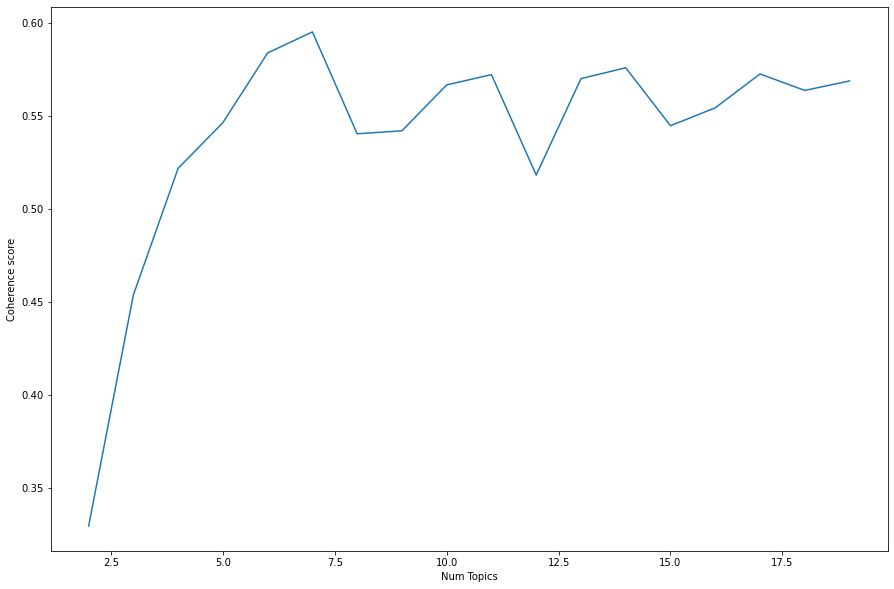

In [16]:
# show graph
x = range(start, limit, step)
plt.figure(figsize=(15, 10))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

In [17]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 2  has Coherence Value of 0.329426
Num Topics = 3  has Coherence Value of 0.453637
Num Topics = 4  has Coherence Value of 0.521673
Num Topics = 5  has Coherence Value of 0.546202
Num Topics = 6  has Coherence Value of 0.583677
Num Topics = 7  has Coherence Value of 0.594949
Num Topics = 8  has Coherence Value of 0.5402
Num Topics = 9  has Coherence Value of 0.541819
Num Topics = 10  has Coherence Value of 0.566481
Num Topics = 11  has Coherence Value of 0.571998
Num Topics = 12  has Coherence Value of 0.518069
Num Topics = 13  has Coherence Value of 0.569846
Num Topics = 14  has Coherence Value of 0.575672
Num Topics = 15  has Coherence Value of 0.544541
Num Topics = 16  has Coherence Value of 0.554162
Num Topics = 17  has Coherence Value of 0.572355
Num Topics = 18  has Coherence Value of 0.563508
Num Topics = 19  has Coherence Value of 0.568598


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Building LDA Model = LDA Model removing my_stop_words & featuring 30 topics
lda_model_optimal = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
pprint(lda_model_optimal.print_topics(num_topics=7, num_words=15))
doc_lda = lda_model_optimal[corpus]

[(0,
  '0.051*"incision" + 0.028*"drainage" + 0.019*"surgeon" + 0.018*"shower" + '
  '0.018*"wound" + 0.017*"concern" + 0.017*"surgery" + 0.017*"month" + '
  '0.017*"redness" + 0.016*"cream" + 0.016*"telephone" + 0.015*"service" + '
  '0.014*"driving" + 0.014*"lifting" + 0.013*"bath"'),
 (1,
  '0.074*"unit" + 0.046*"extended" + 0.029*"solution" + 0.020*"heparin" + '
  '0.019*"bedtime" + 0.019*"constipation" + 0.018*"insulin" + '
  '0.017*"injection" + 0.015*"flush" + 0.015*"acetaminophen" + '
  '0.013*"chewable" + 0.013*"docusate" + 0.012*"gram" + 0.011*"intravenous" + '
  '0.011*"topical"'),
 (2,
  '0.026*"blood" + 0.021*"level" + 0.018*"activity" + 0.018*"mental" + '
  '0.015*"consciousness" + 0.013*"interactive" + 0.013*"alert" + 0.012*"clear" '
  '+ 0.011*"coherent" + 0.011*"heart" + 0.011*"your" + 0.011*"start" + '
  '0.010*"ambulatory" + 0.010*"antibiotic" + 0.010*"need"'),
 (3,
  '0.021*"symptom" + 0.018*"fever" + 0.016*"doctor" + 0.016*"prescribed" + '
  '0.016*"chest" + 0.015*

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_optimal.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_optimal, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -6.653649642618028

Coherence Score:  0.6091008240256695


In [22]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_optimal, corpus, id2word)
vis

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.043423 -0.115855       1        1  26.290497
5      0.090598 -0.035998       2        1  18.509623
1      0.054174 -0.171362       3        1  16.833765
3      0.074928  0.107284       4        1  14.483909
0      0.308837  0.029670       5        1  10.362992
4     -0.306372 -0.184947       6        1   8.946228
6     -0.178742  0.371209       7        1   4.572988, topic_info=            Term         Freq        Total Category  logprob  loglift
166         unit  8464.000000  8464.000000  Default  30.0000  30.0000
251   inhalation  4470.000000  4470.000000  Default  29.0000  29.0000
10          last  6134.000000  6134.000000  Default  28.0000  28.0000
1855    incision  3602.000000  3602.000000  Default  27.0000  27.0000
48      extended  7493.000000  7493.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
222        twice   507.325209  4130.234202   Topic7  -4.1135   0.9881
10          last   551.095812  6134.405066   Topic7  -4.0308   0.6752
601      greater   372.734372  1121.872866   Topic7  -4.4218   1.9831
442        rapid   350.747147  1138.763087   Topic7  -4.4826   1.9074
247        first   310.675258  1801.481332   Topic7  -4.6039   1.3274

[358 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
269       3  0.109588      abdominal
269       4  0.889920      abdominal
356       3  0.537051  acetaminophen
356       4  0.249911  acetaminophen
356       5  0.212684  acetaminophen
...     ...       ...            ...
653       5  0.822291          wound
947       5  0.998785        written
1201      5  0.998972           year
102       1  0.700682           your
102       4  0.298895           your

[468 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 2, 4, 1, 5, 7])

## Creating Vectors For Probabilities {-}

In [23]:
#lda_output = lda_model_optimal.transform(corpus)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
vector = lda_model_optimal[corpus]  # get topic probability distribution for a document

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
vector

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
def Extract(vector):
    return [item[0] for item in vector]

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
vector_prob = Extract(vector)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
vector_prob

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 0.029098192),
  (1, 0.06934294),
  (2, 0.057652943),
  (3, 0.03302758),
  (4, 0.019504694),
  (5, 0.778566),
  (6, 0.012807659)],
 [(0, 0.08522294),
  (1, 0.18037866),
  (2, 0.22637294),
  (3, 0.15337664),
  (4, 0.09481436),
  (5, 0.19853343),
  (6, 0.061300986)],
 [(1, 0.15433368),
  (2, 0.5449979),
  (3, 0.023306448),
  (4, 0.021342723),
  (5, 0.25033104)],
 [(0, 0.08522294),
  (1, 0.18037866),
  (2, 0.22637294),
  (3, 0.15337664),
  (4, 0.09481436),
  (5, 0.19853343),
  (6, 0.061300986)],
 [(0, 0.015919473),
  (1, 0.17702438),
  (2, 0.38682526),
  (3, 0.03896065),
  (4, 0.060325034),
  (5, 0.31816614)],
 [(0, 0.08522294),
  (1, 0.18037866),
  (2, 0.22637294),
  (3, 0.15337664),
  (4, 0.09481436),
  (5, 0.19853343),
  (6, 0.061300986)],
 [(0, 0.0401068),
  (1, 0.06349873),
  (2, 0.386992),
  (3, 0.1366349),
  (5, 0.34554473),
  (6, 0.021523397)],
 [(0, 0.01896737),
  (1, 0.08803884),
  (2, 0.20860244),
  (3, 0.21159479),
  (4, 0.11694255),
  (5, 0.3513465)],
 [(0, 0.08522294),


## Align Index With Column Titles {-}

In [29]:
vector_prob_df = pd.DataFrame(vector_prob, columns=[0,1,2,3,4,5,6])
vector_prob_df.head()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6
0,"(0, 0.029098192)","(1, 0.06934294)","(2, 0.057652943)","(3, 0.03302758)","(4, 0.019504694)","(5, 0.778566)","(6, 0.012807659)"
1,"(0, 0.08522294)","(1, 0.18037866)","(2, 0.22637294)","(3, 0.15337664)","(4, 0.09481436)","(5, 0.19853343)","(6, 0.061300986)"
2,"(1, 0.15433368)","(2, 0.5449979)","(3, 0.023306448)","(4, 0.021342723)","(5, 0.25033104)",None,None
3,"(0, 0.08522294)","(1, 0.18037866)","(2, 0.22637294)","(3, 0.15337664)","(4, 0.09481436)","(5, 0.19853343)","(6, 0.061300986)"
4,"(0, 0.015919473)","(1, 0.17702438)","(2, 0.38682526)","(3, 0.03896065)","(4, 0.060325034)","(5, 0.31816614)",None


In [30]:
def clean_df(df):
    #Create empty dataframe copy
    df2 = pd.DataFrame(np.zeros(df.shape), columns = df.columns)
    nrows = df.shape[0]
    ncolumns = df.shape[1]
    #Populate empty dataframe
    for i in range(nrows):
        #Create key:value pair of each row
        rowdict = dict(zip([x[0] for x in df.iloc[i] if x != None], [x[1] for x in df.iloc[i] if x != None]))
        #Populate row based off of 
        for j in range(ncolumns):
            if j in rowdict.keys():
                df2.iloc[i][j] = rowdict[j]
            else:
                df2.iloc[i][j] = None
    return df2

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
vector_prob_df_align = clean_df(vector_prob_df)
vector_prob_df_align.head()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6
0,0.029098,0.069343,0.057653,0.033028,0.019505,0.778566,0.012808
1,0.085223,0.180379,0.226373,0.153377,0.094814,0.198533,0.061301
2,NaN,0.154334,0.544998,0.023306,0.021343,0.250331,NaN
3,0.085223,0.180379,0.226373,0.153377,0.094814,0.198533,0.061301
4,0.015919,0.177024,0.386825,0.038961,0.060325,0.318166,NaN


In [32]:
vector_prob_df_align.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31977 entries, 0 to 31976
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       30410 non-null  float64
 1   1       31953 non-null  float64
 2   2       31974 non-null  float64
 3   3       31819 non-null  float64
 4   4       30604 non-null  float64
 5   5       31960 non-null  float64
 6   6       29275 non-null  float64
dtypes: float64(7)
memory usage: 1.7 MB


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
vector_prob_df_align

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6
0,0.029098,0.069343,0.057653,0.033028,0.019505,0.778566,0.012808
1,0.085223,0.180379,0.226373,0.153377,0.094814,0.198533,0.061301
2,NaN,0.154334,0.544998,0.023306,0.021343,0.250331,NaN
3,0.085223,0.180379,0.226373,0.153377,0.094814,0.198533,0.061301
4,0.015919,0.177024,0.386825,0.038961,0.060325,0.318166,NaN
...,...,...,...,...,...,...,...
31972,0.085223,0.180379,0.226373,0.153377,0.094814,0.198533,0.061301
31973,0.085223,0.180379,0.226373,0.153377,0.094814,0.198533,0.061301
31974,0.074630,0.282857,0.210735,0.130357,0.080584,0.168736,0.052101
31975,0.085223,0.180379,0.226373,0.153377,0.094814,0.198533,0.061301


In [34]:
topics = vector_prob_df_align
labels = topic_modeling_df['ICD9_CODE']
age = topic_modeling_df['AGE']

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
topic_modeling_results = pd.concat([age, labels, topics], axis=1)
topic_modeling_results

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AGE,ICD9_CODE,0,1,2,3,4,5,6
0,51,5849,0.029098,0.069343,0.057653,0.033028,0.019505,0.778566,0.012808
1,65,51881,0.085223,0.180379,0.226373,0.153377,0.094814,0.198533,0.061301
2,79,51881,NaN,0.154334,0.544998,0.023306,0.021343,0.250331,NaN
3,65,51881,0.085223,0.180379,0.226373,0.153377,0.094814,0.198533,0.061301
4,59,5849,0.015919,0.177024,0.386825,0.038961,0.060325,0.318166,NaN
...,...,...,...,...,...,...,...,...,...
31972,65,53081,0.085223,0.180379,0.226373,0.153377,0.094814,0.198533,0.061301
31973,73,53081,0.085223,0.180379,0.226373,0.153377,0.094814,0.198533,0.061301
31974,79,4019,0.074630,0.282857,0.210735,0.130357,0.080584,0.168736,0.052101
31975,51,4019,0.085223,0.180379,0.226373,0.153377,0.094814,0.198533,0.061301


In [36]:
topic_modeling_results.isna().sum()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AGE             0
ICD9_CODE       0
0            1567
1              24
2               3
3             158
4            1373
5              17
6            2702
dtype: int64

In [37]:
topic_modeling_results = topic_modeling_results.fillna(0)
topic_modeling_results

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AGE,ICD9_CODE,0,1,2,3,4,5,6
0,51,5849,0.029098,0.069343,0.057653,0.033028,0.019505,0.778566,0.012808
1,65,51881,0.085223,0.180379,0.226373,0.153377,0.094814,0.198533,0.061301
2,79,51881,0.000000,0.154334,0.544998,0.023306,0.021343,0.250331,0.000000
3,65,51881,0.085223,0.180379,0.226373,0.153377,0.094814,0.198533,0.061301
4,59,5849,0.015919,0.177024,0.386825,0.038961,0.060325,0.318166,0.000000
...,...,...,...,...,...,...,...,...,...
31972,65,53081,0.085223,0.180379,0.226373,0.153377,0.094814,0.198533,0.061301
31973,73,53081,0.085223,0.180379,0.226373,0.153377,0.094814,0.198533,0.061301
31974,79,4019,0.074630,0.282857,0.210735,0.130357,0.080584,0.168736,0.052101
31975,51,4019,0.085223,0.180379,0.226373,0.153377,0.094814,0.198533,0.061301


In [38]:
topic_modeling_results.isna().sum()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AGE          0
ICD9_CODE    0
0            0
1            0
2            0
3            0
4            0
5            0
6            0
dtype: int64

## Saving to CSV File {-}

In [39]:
topic_modeling_results.to_csv('topic_modeling_discharge_mimic_7_topics.csv', index=False)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Extracting Topic Words {-}

In [ ]:
# topic_words = lda_model_optimal.print_topics(num_topics=11, num_words=6)
# topic_words

In [ ]:
# type(topic_words)

In [ ]:
# def clean_txt(txt):
#     #remove text
#     txt = txt.replace("\n",' ')
#     #txt = txt.replace(remove_words, ' ')
#     #punctuation
#     txt = re.sub(r'[^\w\s]', ' ', txt)
#     #numbers removing
#     txt=''.join(i for i in txt if not i.isdigit())
#     TAG_RE = re.compile(r'<[^>]+>') 
#     txt = TAG_RE.sub('', txt.lower())
#     #tokenization of words
#     txt = word_tokenize(txt)
#     return txt

In [ ]:
# topic_words = str(topic_words)
# topic_words

In [ ]:
# topic_words_list = clean_txt(topic_words)
# topic_words_list

In [ ]:
# type(topic_words_list)

In [ ]:
# topic_words_list_series = pd.Series(topic_words_list)
# topic_words_list_series

In [ ]:
# topic_words_list_series.to_csv('topic_words_list_series_top_6_words_age_filtered.csv', index=False)